In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyrosm 
import folium
import branca
import numpy as np
import networkx as nx
import pandas as pd
import numpy as np
import urllib.request
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from folium.plugins import MarkerCluster
from shapely.geometry import Point, LineString
from datetime import datetime
from datasets_tourism import *
pd.options.mode.chained_assignment = None  # default='warn'

> 2024-06-22 11:27:15,573 [info] Project loaded successfully: {'project_name': 'overtourism'}


<img src="TURISMO_Architettura-EntitiesRelations.drawio.png" alt="entities" />

In [3]:
START_DATE = "2023-06-01"
END_DATE= "2023-10-30"

# Parcheggi

In [4]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


In [5]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]] = statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]].astype(int)

## Capienza massima TOTALE (2022-08-15) 1257 veicoli

In [6]:
statistiche_parcheggi_molveno_df[["date", "TOTALE"]].sort_values(by=["TOTALE"], ascending=False).head(20)

,date,TOTALE
19,2022-08-15,1257
20,2022-08-16,1244
354,2023-07-16,1169
18,2022-08-14,1152
389,2023-08-20,1142
388,2023-08-19,1114
383,2023-08-14,1112
21,2022-08-17,1074
4,2022-07-31,1056
382,2023-08-13,1050


In [7]:
statistiche_parcheggi_molveno_df[["TOTALE"]].max()

TOTALE    1257
dtype: int64

In [8]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df["TOTALE"] == 1257]

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
19,28,5,31,30,46,44,181,203,208,167,...,2,9,4,1,0,0,0,0,1257,2022-08-15


<Axes: xlabel='date'>

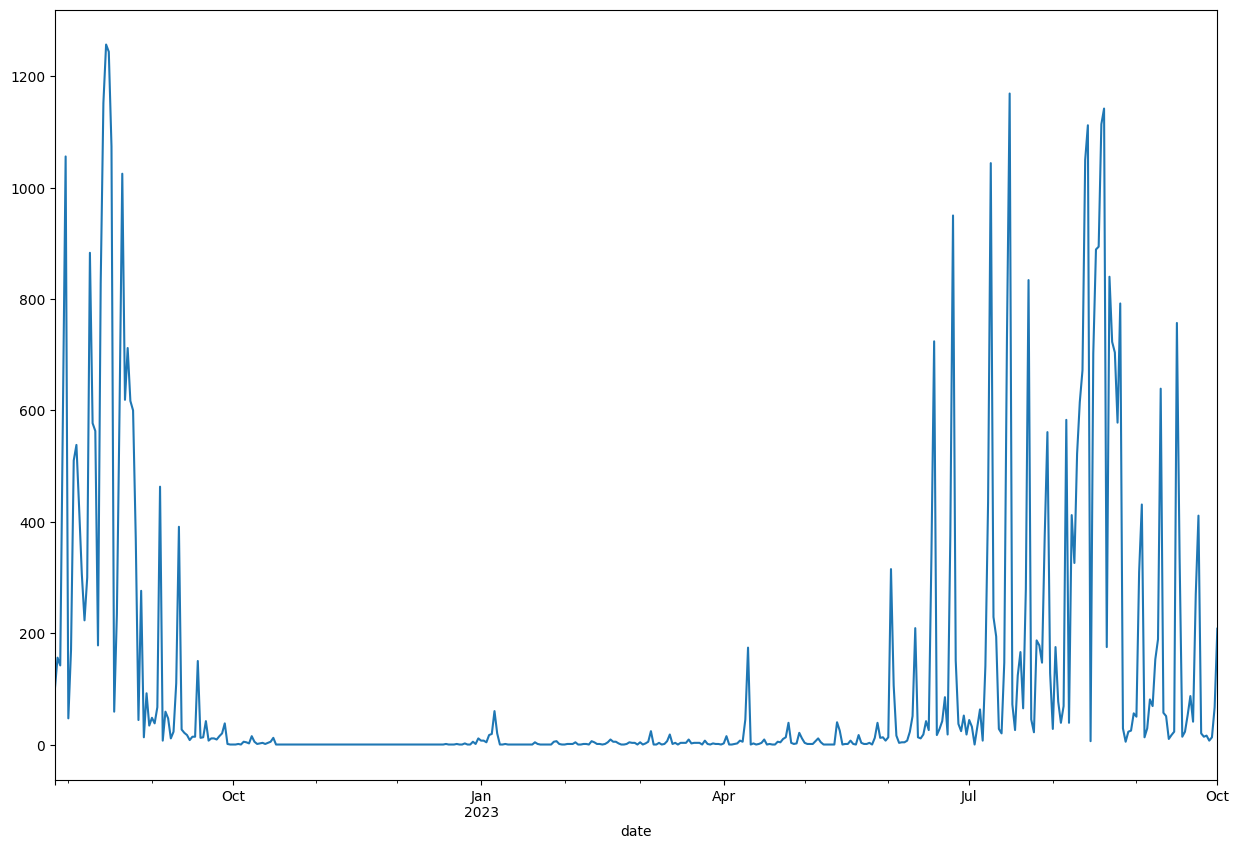

In [9]:
statistiche_parcheggi_molveno_df.groupby("date")["TOTALE"].max().plot(x="date", figsize=(15, 10))

## Capienze massime in base ai time slots

In [10]:
parking_duration_days = list(statistiche_parcheggi_molveno_df.columns[-10:-1])
print(parking_duration_days)
print(len(parking_duration_days))

['1 GIORNO', '2 GIORNI', '3 GIORNI', '4 GIORNI', '5 GIORNI', '6 GIORNI', '7 GIORNI', '8 GIORNI', 'TOTALE']
9


In [11]:
parking_duration_hours = list(statistiche_parcheggi_molveno_df.columns[:-10])
print(parking_duration_hours)
print(len(parking_duration_hours))

['20 MIN', '40 MIN', '1 ORA', '1 ORA E 20 MIN', '1 ORA E 40 MIN', '2 ORE', '3 ORE', '4 ORE', '5 ORE', '6 ORE', '7 ORE', '8 ORE', '9 ORE', '10 ORE', '11 ORE', '12 ORE', '13 ORE', '14 ORE', '15 ORE', '16 ORE', '17 ORE', '18 ORE', '19 ORE', '20 ORE', '21 ORE', '22 ORE', '23 ORE']
27


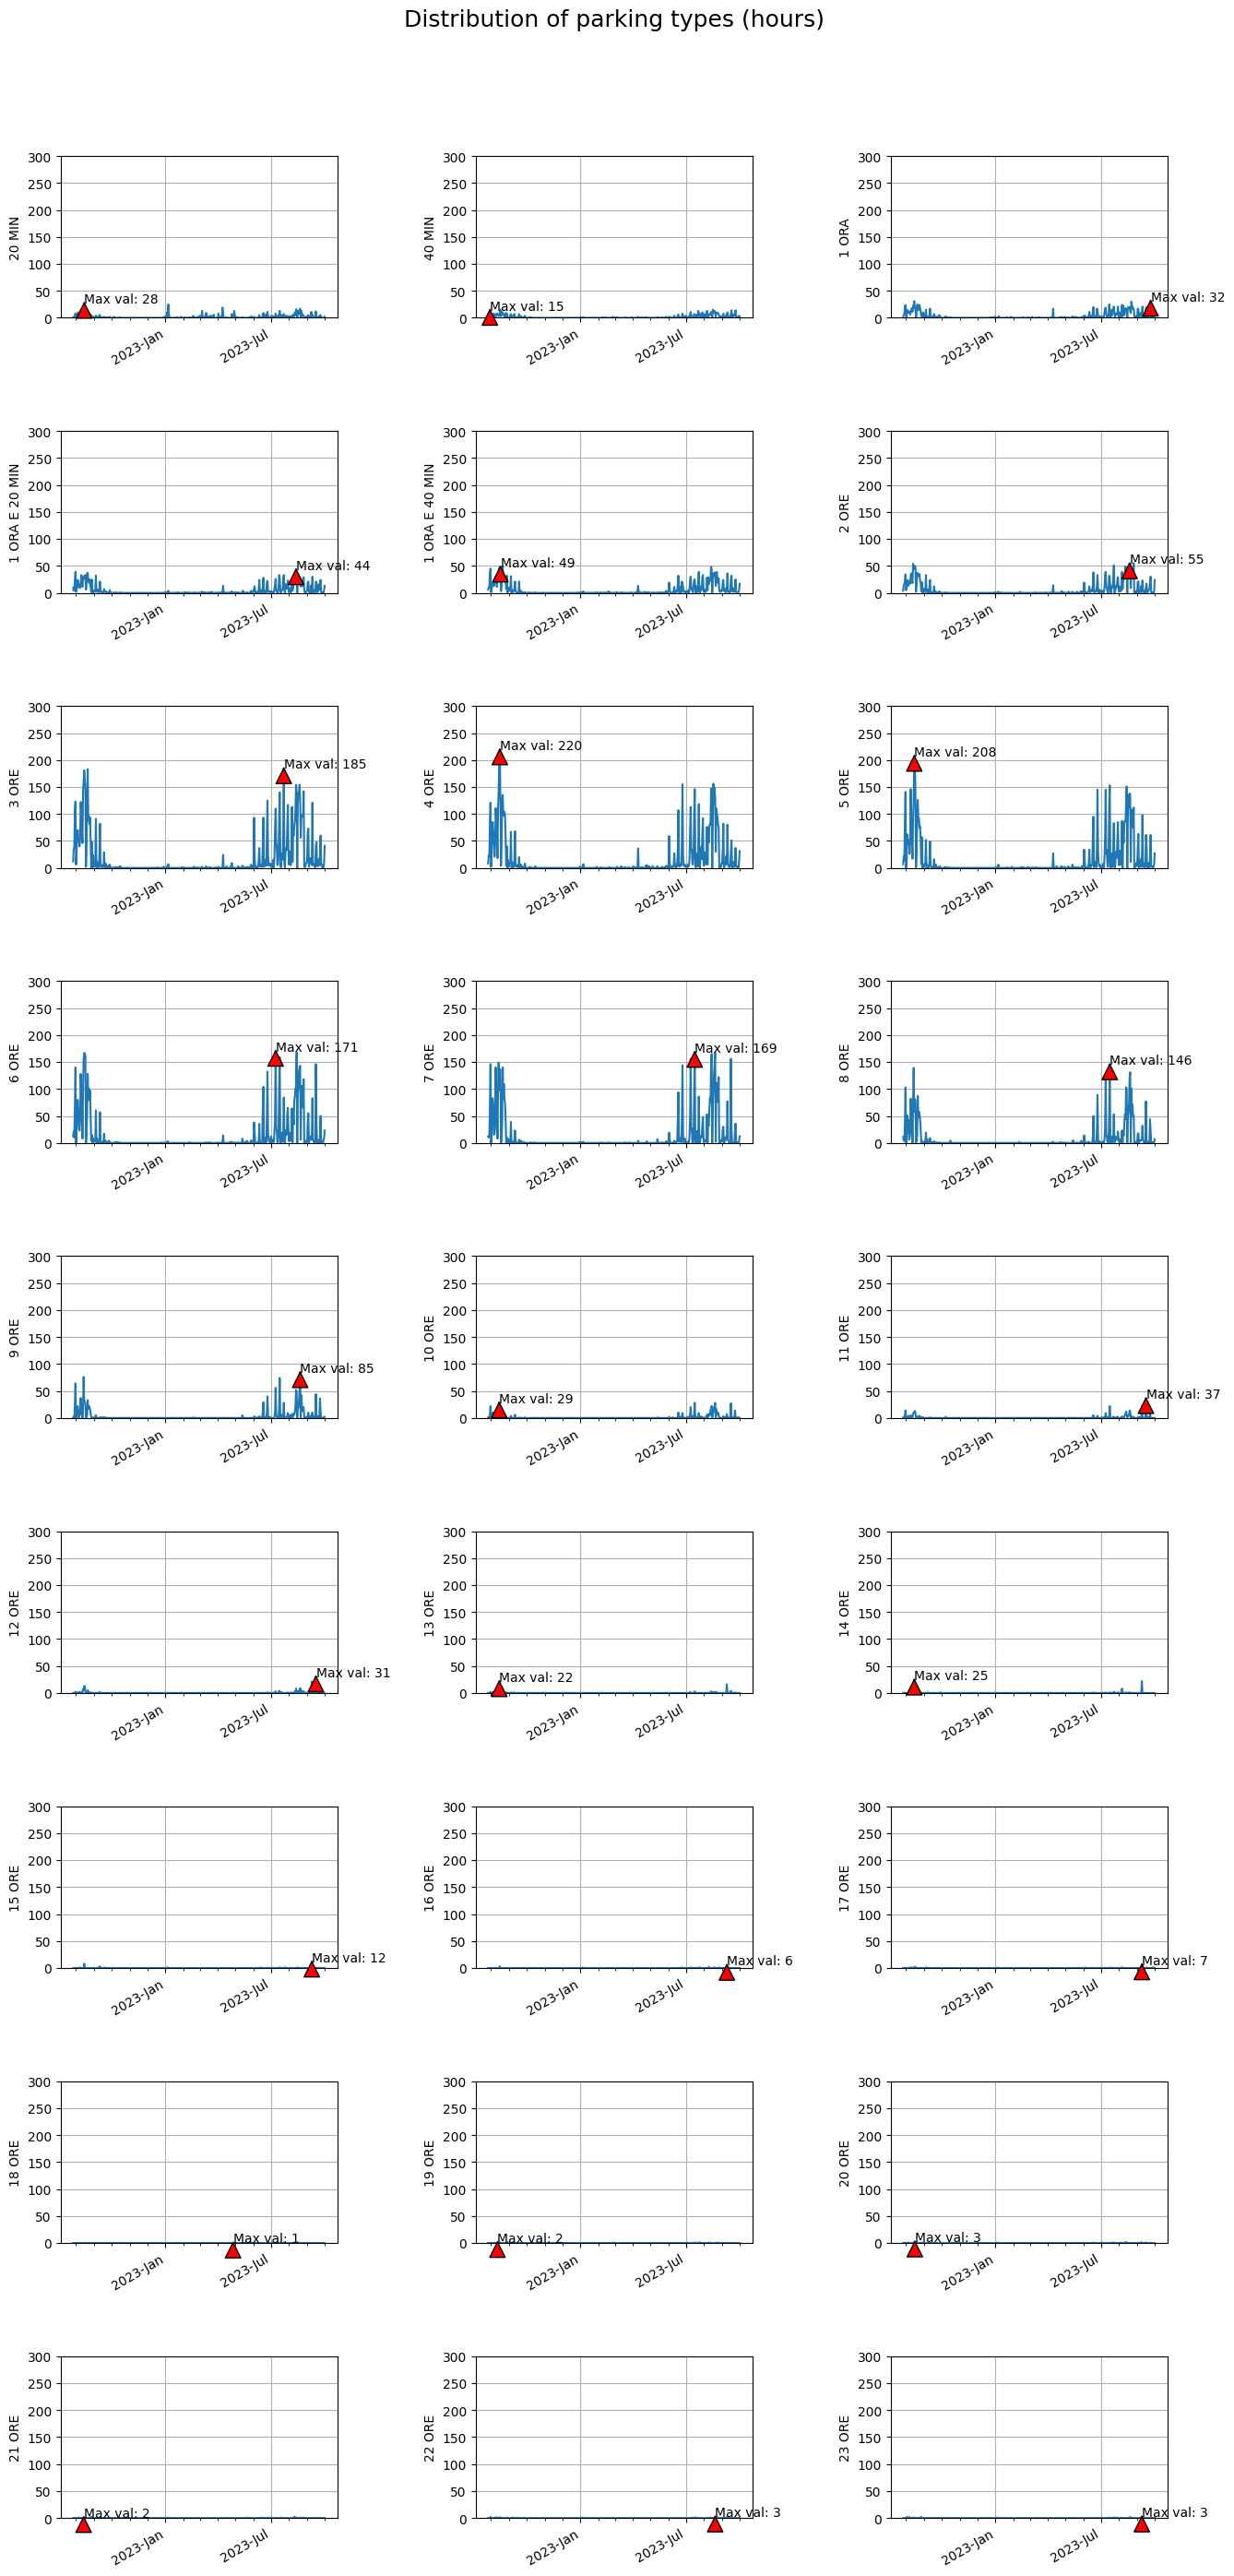

In [12]:
plt.figure(figsize=(15, 32))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.7)
plt.suptitle("Distribution of parking types (hours)", fontsize=18, y=0.95)
for n, type_parking in enumerate(parking_duration_hours):
    ax = plt.subplot(9, 3, n + 1)
    x = statistiche_parcheggi_molveno_df["date"]
    y = statistiche_parcheggi_molveno_df[type_parking]
    
    ax.plot(x, y)

    # chart formatting
    ax.set_ylabel(type_parking.upper())
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    # Get the x and y values at the maximum index
    max_index = y.idxmax() #np.argmax(y) # or use 
    max_x = x[max_index]
    max_y = y[max_index]
    ax.annotate(f'Max val: {max_y}', xy=(max_x, max_y), xytext=(max_x, max_y),
             arrowprops=dict(facecolor='red', shrink=0.02))
    plt.setp(ax, ylim=(0, 300)) # set the same range for all subplots otherwise we are not able to visually compare them
plt.show()

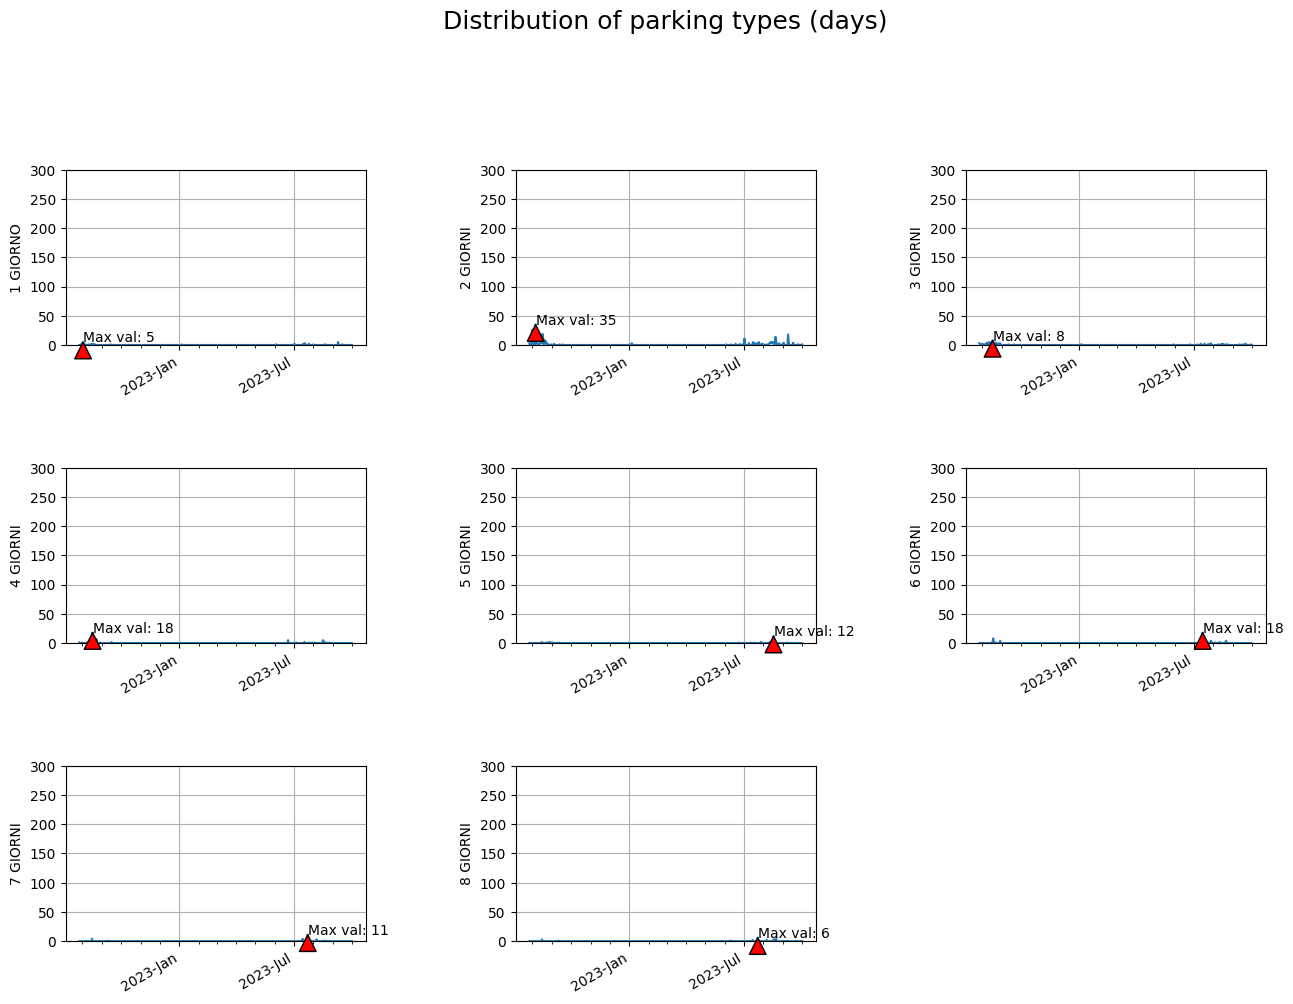

In [13]:
plt.figure(figsize=(15, 32))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.7)
plt.suptitle("Distribution of parking types (days)", fontsize=18, y=0.95)
for n, type_parking in enumerate(parking_duration_days[:-1]):
    ax = plt.subplot(9, 3, n + 1)
    x = statistiche_parcheggi_molveno_df["date"]
    y = statistiche_parcheggi_molveno_df[type_parking]
    
    ax.plot(x, y)

    # chart formatting
    ax.set_ylabel(type_parking.upper())
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    # Get the x and y values at the maximum index
    max_index = y.idxmax()
    max_x = x[max_index]
    max_y = y[max_index]
    ax.annotate(f'Max val: {max_y}', xy=(max_x, max_y), xytext=(max_x, max_y),
             arrowprops=dict(facecolor='red', shrink=0.02))
    plt.setp(ax, ylim=(0, 300)) # set the same range for all subplots otherwise we are not able to visually compare them
plt.show()

# Traffico (Contamezzi)

## Spiaggia

In [14]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)

In [15]:
entrata_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 1) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 2) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_lago = differenza_lago.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 10:00:00,2023-06-29,10,35,3,-2,1,0,1,0,5,43
1,2023-06-29 11:00:00,2023-06-29,11,71,4,1,3,4,1,0,6,90
2,2023-06-29 12:00:00,2023-06-29,12,88,14,4,3,3,1,0,8,121
3,2023-06-29 13:00:00,2023-06-29,13,102,16,5,8,4,1,0,9,145
4,2023-06-29 14:00:00,2023-06-29,14,104,13,2,12,5,1,0,10,147
...,...,...,...,...,...,...,...,...,...,...,...,...
2337,2023-10-04 19:00:00,2023-10-04,19,15706,2141,-40,980,1380,-55,-49,-3335,16728
2338,2023-10-04 20:00:00,2023-10-04,20,15698,2140,-39,980,1380,-55,-49,-3334,16721
2339,2023-10-04 21:00:00,2023-10-04,21,15698,2140,-39,980,1380,-55,-49,-3334,16721
2340,2023-10-04 22:00:00,2023-10-04,22,15696,2142,-39,980,1380,-55,-49,-3334,16721


### Cumulativa max

In [16]:
cumulativa_lago.max()

date           2023-10-04 23:00:00
day            2023-10-04 00:00:00
hour                            23
cl1                          16103
cl2                           2208
cl3                            430
cl4                            980
cl5                           1380
cl6                             12
cl7                              0
nonrilevato                     12
total_cars                   17120
dtype: object

In [17]:
cumulativa_lago.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2342,2342,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,2023-08-17 04:30:00,2023-08-16 16:58:12.399658240,11.529889,8292.590521,1343.994022,69.751067,646.915457,747.088386,-20.639197,-23.166524,-1766.356106,9290.177626
min,2023-06-29 10:00:00,2023-06-29 00:00:00,0.000000,6.000000,3.000000,-87.000000,1.000000,0.000000,-55.000000,-49.000000,-3335.000000,43.000000
25%,2023-07-23 19:15:00,2023-07-23 00:00:00,6.000000,2956.000000,1064.000000,-20.000000,453.000000,375.000000,-44.000000,-38.000000,-2888.000000,4268.000000
50%,2023-08-17 04:30:00,2023-08-17 00:00:00,12.000000,8339.500000,1457.000000,30.000000,707.000000,788.500000,-16.000000,-18.000000,-1569.500000,9725.000000
75%,2023-09-10 13:45:00,2023-09-10 00:00:00,18.000000,14302.750000,1741.000000,159.000000,889.000000,1148.750000,0.000000,-11.000000,-879.250000,15015.000000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,16103.000000,2208.000000,430.000000,980.000000,1380.000000,12.000000,0.000000,12.000000,17120.000000
std,NaN,NaN,6.920721,5618.218517,534.106266,120.912188,271.339248,415.937312,23.065126,14.995102,1098.043569,5554.648958


In [18]:
cumulativa_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
2260,2023-10-01 14:00:00,2023-10-01,14,16103,2208,-77,968,1323,-52,-47,-3306,17120
2259,2023-10-01 13:00:00,2023-10-01,13,16071,2204,-78,967,1324,-52,-47,-3304,17085
2258,2023-10-01 12:00:00,2023-10-01,12,16072,2200,-80,967,1323,-52,-46,-3301,17083
2261,2023-10-01 15:00:00,2023-10-01,15,16056,2200,-74,968,1324,-51,-47,-3309,17067
2257,2023-10-01 11:00:00,2023-10-01,11,15946,2201,-82,967,1323,-52,-46,-3301,16956
2262,2023-10-01 16:00:00,2023-10-01,16,15927,2181,-75,967,1327,-51,-47,-3316,16913
2236,2023-09-30 14:00:00,2023-09-30,14,15808,2181,-87,971,1319,-51,-47,-3258,16836
2235,2023-09-30 13:00:00,2023-09-30,13,15800,2181,-87,972,1319,-51,-47,-3254,16833
2237,2023-09-30 15:00:00,2023-09-30,15,15798,2179,-85,970,1320,-51,-47,-3265,16819
2238,2023-09-30 16:00:00,2023-09-30,16,15776,2189,-80,972,1320,-51,-47,-3270,16809


### Differenza max

In [19]:
differenza_lago.max()

date           2023-10-04 23:00:00
day            2023-10-04 00:00:00
hour                            23
cl1                            304
cl2                             41
cl3                             16
cl4                             11
cl5                              9
cl6                              4
cl7                              3
nonrilevato                    119
total_cars                     376
dtype: object

In [20]:
differenza_lago.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2342,2342,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,2023-08-17 04:30:00,2023-08-16 16:58:12.399658240,11.529889,6.702818,0.915030,-0.016652,0.418446,0.589240,-0.023484,-0.020922,-1.423570,7.140905
min,2023-06-29 10:00:00,2023-06-29 00:00:00,0.000000,-295.000000,-102.000000,-62.000000,-56.000000,-24.000000,-15.000000,-5.000000,-101.000000,-481.000000
25%,2023-07-23 19:15:00,2023-07-23 00:00:00,6.000000,-8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-7.000000
50%,2023-08-17 04:30:00,2023-08-17 00:00:00,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023-09-10 13:45:00,2023-09-10 00:00:00,18.000000,12.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.000000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,304.000000,41.000000,16.000000,11.000000,9.000000,4.000000,3.000000,119.000000,376.000000
std,NaN,NaN,6.920721,54.952005,8.760814,4.764795,3.036438,1.897732,0.752529,0.482932,9.971935,70.153458


In [21]:
differenza_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
1895,2023-09-16 09:00:00,2023-09-16,9,238,28,2,6,3,0,1,98,376
240,2023-07-09 10:00:00,2023-07-09,10,304,24,4,1,7,0,0,13,353
408,2023-07-16 10:00:00,2023-07-16,10,300,20,7,3,2,-1,0,13,344
241,2023-07-09 11:00:00,2023-07-09,11,301,18,2,0,1,0,0,19,341
1296,2023-08-22 10:00:00,2023-08-22,10,222,41,15,6,5,1,0,44,334
409,2023-07-16 11:00:00,2023-07-16,11,233,32,4,-1,3,0,1,53,325
1320,2023-08-23 10:00:00,2023-08-23,10,253,39,3,2,3,-1,1,12,312
1248,2023-08-20 10:00:00,2023-08-20,10,288,17,7,0,1,1,-1,-2,311
1080,2023-08-13 10:00:00,2023-08-13,10,211,22,13,0,3,0,3,59,311
1104,2023-08-14 10:00:00,2023-08-14,10,214,25,5,4,7,4,0,48,307


## Gestione Strade

In [22]:
contamezzi_df = mlrun.get_dataitem("s3://datalake/projects/overtourism/artifacts/contamezzi.parquet.parquet").as_df()
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)

entrata_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_1 = entrata_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_1 = uscita_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_2 = entrata_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_2 = uscita_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese = entrata_paese_1.set_index(['date','day','hour']).add(entrata_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()
uscita_paese = uscita_paese_1.set_index(['date','day','hour']).add(uscita_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()

differenza_paese = entrata_paese.set_index(['date','day','hour']).subtract(uscita_paese.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_paese = differenza_paese.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_paese[c] = cumulativa_paese[c].cumsum()
cumulativa_paese

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-06-29 09:00:00,2023-06-29,9,23.0,4.0,-3.0,1.0,0.0,0.0,0.0,-2.0,23.0
1,2023-06-29 10:00:00,2023-06-29,10,68.0,17.0,-3.0,0.0,3.0,1.0,0.0,-4.0,82.0
2,2023-06-29 11:00:00,2023-06-29,11,87.0,36.0,-3.0,10.0,4.0,1.0,-1.0,2.0,136.0
3,2023-06-29 12:00:00,2023-06-29,12,135.0,49.0,-2.0,16.0,0.0,0.0,-1.0,11.0,208.0
4,2023-06-29 13:00:00,2023-06-29,13,115.0,61.0,2.0,22.0,-1.0,0.0,1.0,11.0,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2023-10-04 19:00:00,2023-10-04,19,-8136.0,23531.0,9066.0,4663.0,1057.0,343.0,-158.0,4652.0,35018.0
2339,2023-10-04 20:00:00,2023-10-04,20,-8131.0,23531.0,9066.0,4663.0,1057.0,343.0,-158.0,4653.0,35024.0
2340,2023-10-04 21:00:00,2023-10-04,21,-8130.0,23530.0,9066.0,4663.0,1057.0,343.0,-158.0,4654.0,35025.0
2341,2023-10-04 22:00:00,2023-10-04,22,-8130.0,23529.0,9066.0,4663.0,1057.0,343.0,-158.0,4654.0,35024.0


In [23]:
cumulativa_paese.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2343,2343,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,2023-08-17 04:00:00,2023-08-16 16:28:16.286811648,11.528809,-4489.014938,12956.320529,4851.855741,2620.556978,495.377294,194.609048,-66.443875,2345.808365,18909.069142
min,2023-06-29 09:00:00,2023-06-29 00:00:00,0.000000,-8151.000000,4.000000,-3.000000,0.000000,-15.000000,0.000000,-158.000000,-4.000000,23.000000
25%,2023-07-23 18:30:00,2023-07-23 00:00:00,6.000000,-6559.500000,6454.000000,2276.500000,1300.500000,226.500000,87.000000,-104.000000,1173.000000,9433.000000
50%,2023-08-17 04:00:00,2023-08-17 00:00:00,12.000000,-5352.000000,12927.000000,5007.000000,2688.000000,486.000000,205.000000,-63.000000,2361.000000,18326.000000
75%,2023-09-10 13:30:00,2023-09-10 00:00:00,18.000000,-2171.000000,20321.000000,7496.000000,4082.000000,740.000000,307.000000,-24.000000,3558.500000,30255.000000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,247.000000,23532.000000,9066.000000,4663.000000,1057.000000,349.000000,5.000000,4654.000000,35149.000000
std,NaN,NaN,6.919440,2512.466495,7510.825847,2851.751313,1487.854277,329.145224,111.261108,48.829136,1380.081178,11168.741561


In [24]:
cumulativa_paese[["date","total_cars"]].max()

date          2023-10-04 23:00:00
total_cars                35149.0
dtype: object

# Dati Vodafone

In [25]:
vodafone_attendences_df["date"] = pd.to_datetime(vodafone_attendences_df["date"])

LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

presenze_vodafone = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    #(vodafone_attendences_df["userProfile"] == "TOURIST") &
    (vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO)
]
presenze_vodafone

,date,locType,locId,userCountry,userProfile,userCluster,value
2793134,2023-06-01,TN_MKT_AM_22,105,ALB,TOURIST,None,166
2793139,2023-06-01,TN_MKT_AM_22,105,AUT,TOURIST,A,86
2793140,2023-06-01,TN_MKT_AM_22,105,AUT,VISITOR,A,79
2793153,2023-06-01,TN_MKT_AM_22,105,CHE,TOURIST,CH,40
2793159,2023-06-01,TN_MKT_AM_22,105,CZE,TOURIST,CZ,54
...,...,...,...,...,...,...,...
3783711,2023-10-30,TN_MKT_AM_22,105,ROU,VISITOR,UE,72
3783714,2023-10-30,TN_MKT_AM_22,105,SRB,TOURIST,UE,18
3783718,2023-10-30,TN_MKT_AM_22,105,SVN,TOURIST,UE,40
3783720,2023-10-30,TN_MKT_AM_22,105,SWE,TOURIST,UE,58


In [26]:
presenze_vodafone_visitors = presenze_vodafone[(presenze_vodafone["userProfile"] == "VISITOR")]
presenze_vodafone_visitors

,date,locType,locId,userCountry,userProfile,userCluster,value
2793140,2023-06-01,TN_MKT_AM_22,105,AUT,VISITOR,A,79
2793160,2023-06-01,TN_MKT_AM_22,105,CZE,VISITOR,CZ,57
2793163,2023-06-01,TN_MKT_AM_22,105,DEU,VISITOR,DE,615
2793173,2023-06-01,TN_MKT_AM_22,105,ESP,VISITOR,UE,29
2793180,2023-06-01,TN_MKT_AM_22,105,FRA,VISITOR,UE,72
...,...,...,...,...,...,...,...
3783663,2023-10-30,TN_MKT_AM_22,105,GBR,VISITOR,UK,32
3783678,2023-10-30,TN_MKT_AM_22,105,ITA,VISITOR,IT,7902
3783682,2023-10-30,TN_MKT_AM_22,105,LTU,VISITOR,UE,51
3783704,2023-10-30,TN_MKT_AM_22,105,POL,VISITOR,PL,90


In [27]:
presenze_vodafone_visitors[presenze_vodafone_visitors["date"] == "2023-07-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119
2980747,2023-07-01,TN_MKT_AM_22,105,CZE,VISITOR,CZ,260
2980750,2023-07-01,TN_MKT_AM_22,105,DEU,VISITOR,DE,432
2980752,2023-07-01,TN_MKT_AM_22,105,DNK,VISITOR,UE,133
2980757,2023-07-01,TN_MKT_AM_22,105,ESP,VISITOR,UE,22
2980764,2023-07-01,TN_MKT_AM_22,105,FRA,VISITOR,UE,47
2980766,2023-07-01,TN_MKT_AM_22,105,GBR,VISITOR,UK,44
2980770,2023-07-01,TN_MKT_AM_22,105,GRC,VISITOR,UE,18
2980774,2023-07-01,TN_MKT_AM_22,105,HUN,VISITOR,UE,22
2980781,2023-07-01,TN_MKT_AM_22,105,ISR,VISITOR,None,18


In [28]:
presenze_vodafone_visitors.groupby("date")[["value"]].sum().head(10).sort_values(by="value", ascending=False)

,value
date,
2023-06-09,15873
2023-06-08,12169
2023-06-06,11740
2023-06-07,11644
2023-06-01,11587
2023-06-03,10146
2023-06-10,9992
2023-06-05,9578
2023-06-04,9314


<Axes: xlabel='date'>

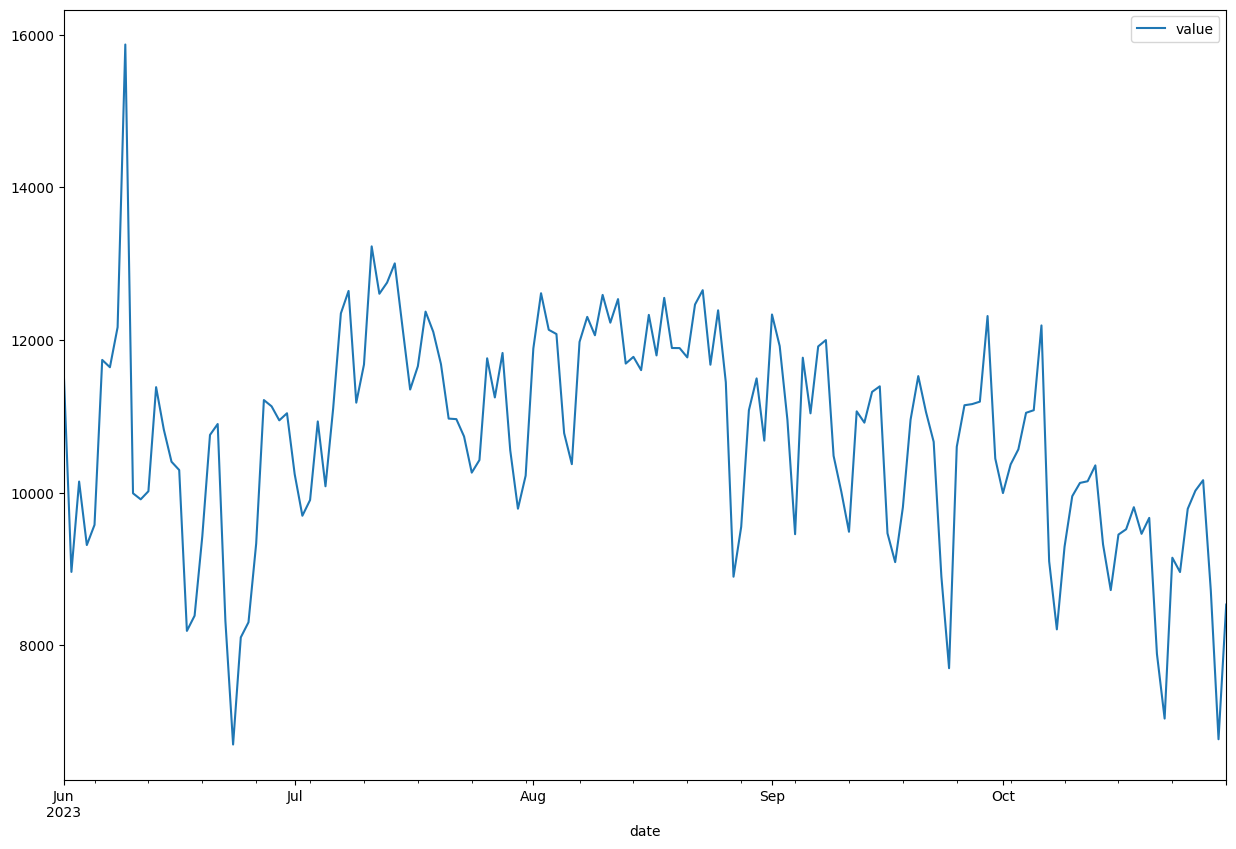

In [29]:
presenze_vodafone_visitors.groupby("date")[["value"]].sum().plot(figsize=(15, 10))

## The dates with the highest number of visitors

<Axes: xlabel='date'>

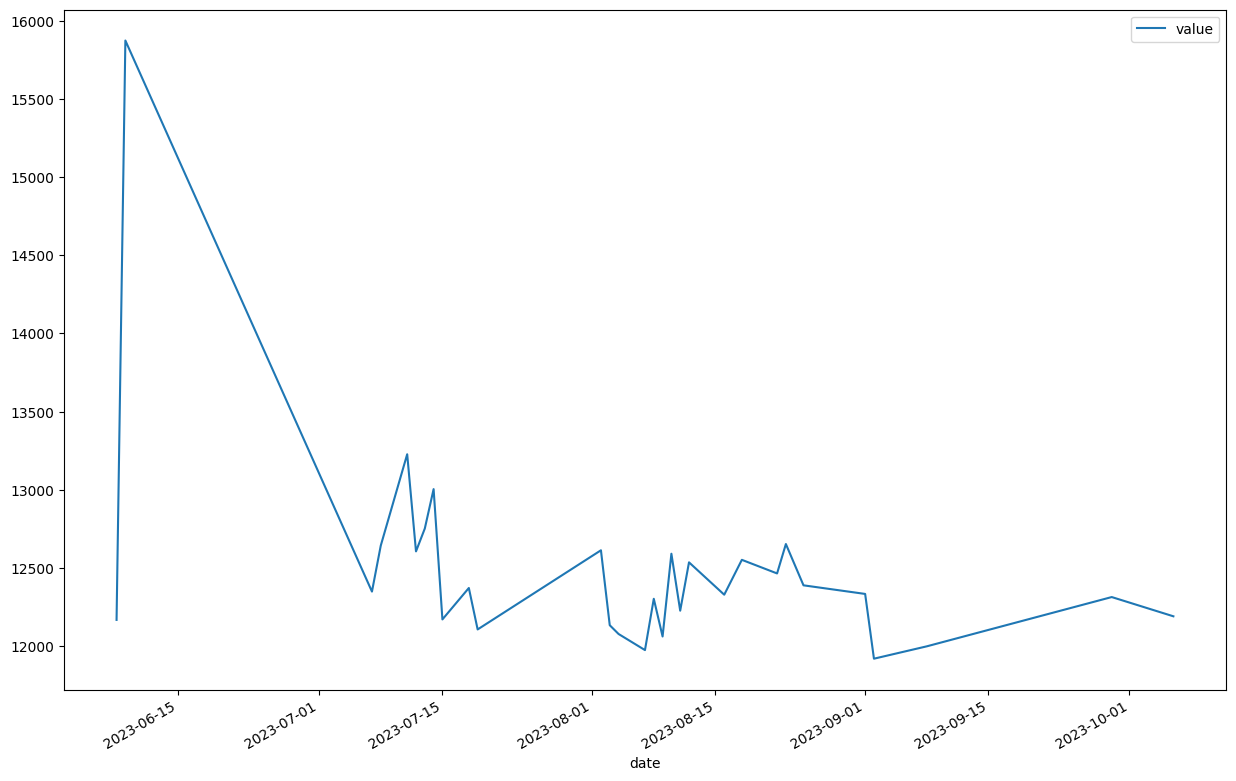

In [30]:
max_visitors = presenze_vodafone_visitors.groupby("date")[["value"]].sum().sort_values(by="value", ascending=False).head(30)
max_visitors.plot(figsize=(15, 10))

# Dati Meteo

## Pioggia

<Axes: xlabel='date'>

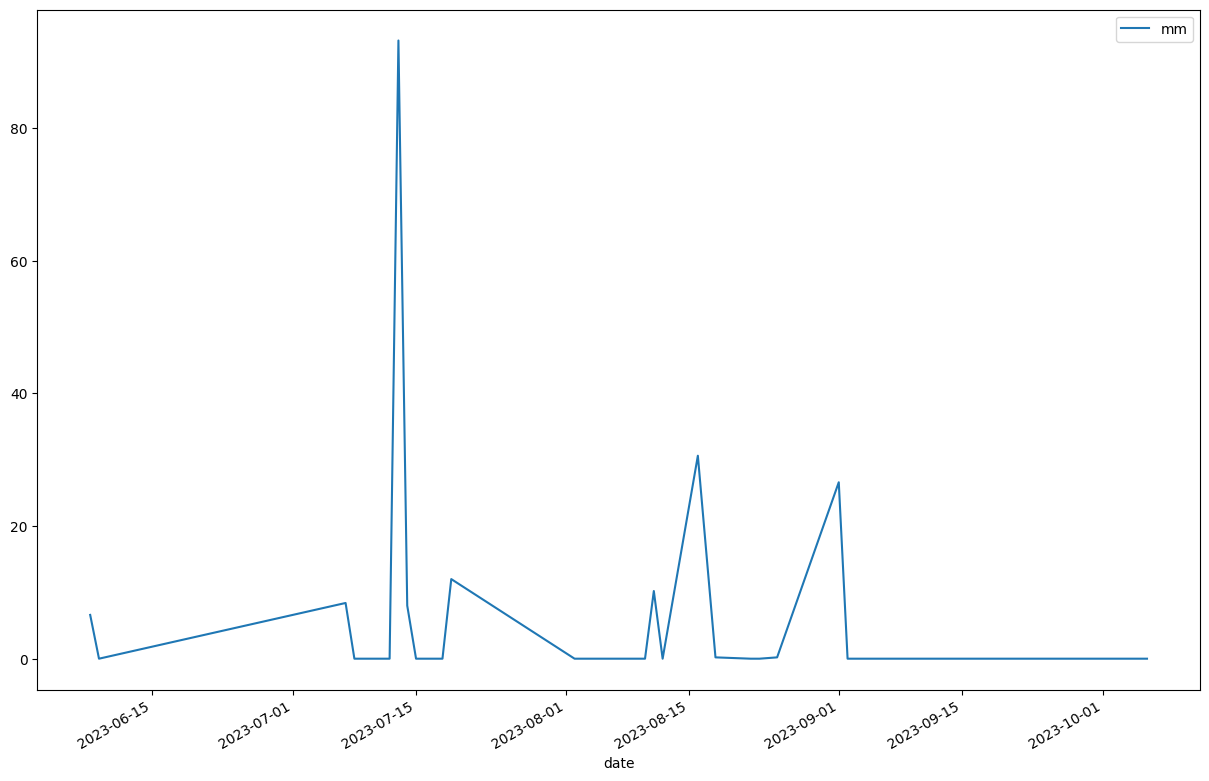

In [31]:
pioggia_for_max_visitors = dati_pioggia_df[dati_pioggia_df["date"].isin(max_visitors.reset_index()["date"])]
pioggia_for_max_visitors.plot(x="date", figsize=(15, 10))

In [32]:
max_visitors.reset_index().sort_values(by="date")["value"]

22    12169
0     15873
14    12350
5     12644
1     13228
7     12607
3     12753
2     13005
21    12172
13    12373
24    12108
6     12614
23    12135
25    12079
28    11976
18    12304
26    12063
8     12592
19    12228
10    12537
16    12330
9     12553
11    12466
4     12654
12    12390
15    12335
29    11921
27    12000
17    12315
20    12192
Name: value, dtype: int64

In [33]:
pioggia_for_max_visitors.reset_index().sort_values(by="date")["mm"]

13     6.6
22     0.0
6      8.4
14     0.0
26     0.0
28     0.0
8     93.2
9      8.0
10     0.0
11     0.0
12    12.0
1      0.0
3      0.0
4      0.0
7      0.0
15     0.0
23     0.0
25     0.0
27    10.2
29     0.0
17    30.6
18     0.2
19     0.0
20     0.0
21     0.2
0     26.6
2      0.0
16     0.0
24     0.0
5      0.0
Name: mm, dtype: float64

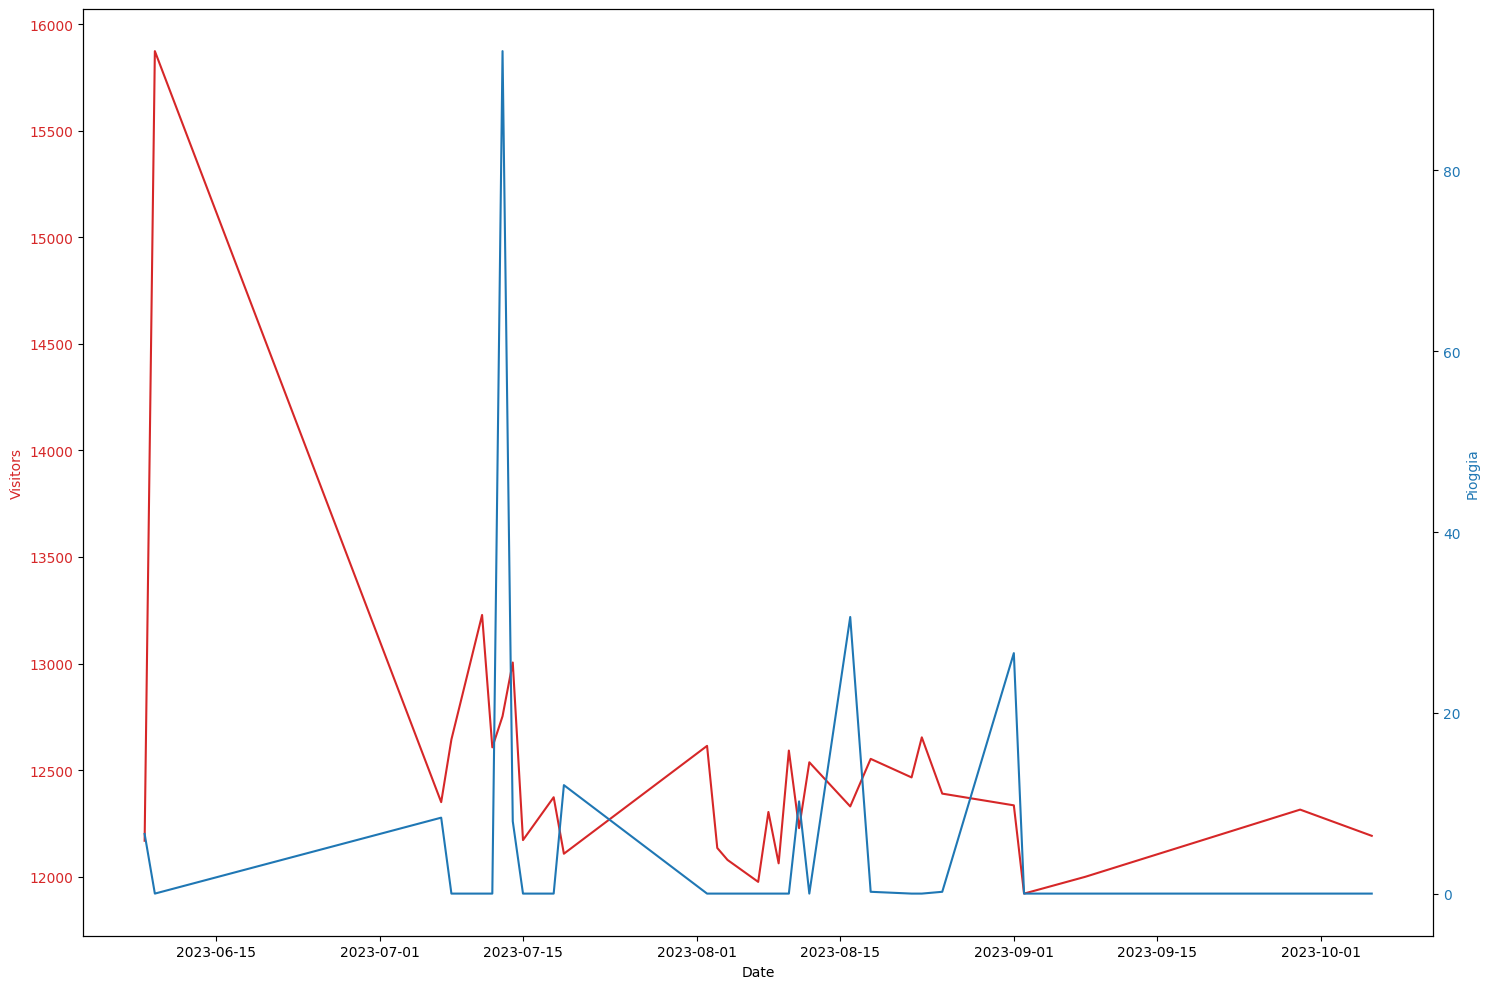

In [34]:
max_visitors_plot = max_visitors.reset_index().sort_values(by="date")
time_frame = max_visitors_plot["date"]
visitors = max_visitors_plot["value"]

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Visitors', color=color)
ax1.plot(time_frame, visitors, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pioggia', color=color) 
ax2.plot(time_frame, pioggia_for_max_visitors.reset_index().sort_values(by="date")["mm"], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

# Eventi

In [35]:
manifestazioni_df

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
4,0,0,0,0,0,0,0,0,429000,0,0.0,Totale,46400,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
6,0,0,0,0,0,0,0,0,500000,0,0.0,totale,175000,2023_first_part
7,0,0,0,0,0,0,0,0,0,0,0.0,TOTALE,221400,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000.0,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part


In [36]:
manifestazioni_df[manifestazioni_df["luogo"].str.contains("Molveno")]

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
17,84,X-Tribe Società Sportiva Dilettantistica a Res...,Xterra World Championship e World Cup Competi...,Molveno -Andalo,2024-09-26 00:00:00,2024-09-29 00:00:00,3500,500000.0,500000.0,si,65.5,0.35,175000,2024_first_part


In [37]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "participants"])
manifestazioni_df["partecipanti_dichiarati"] = manifestazioni_df["partecipanti_dichiarati"].astype(float).astype(int)

In [38]:
D = "D"
for event in manifestazioni_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)
        for date in date_list:
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "participants": participants}
            eventi.loc[len(eventi)] = row
eventi

,event_name,date,organizer,location,participants
0,Week 4 Kids,2023-03-12,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
1,Week 4 Kids,2023-03-13,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
2,Week 4 Kids,2023-03-14,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
3,Week 4 Kids,2023-03-15,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
4,Week 4 Kids,2023-03-16,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
...,...,...,...,...,...
283,5 Days Dolomiti Paganella 2024,2024-07-06,5 Days Italy Società Sportiva Dilettantistica ...,Varie località,1200
284,Xterra World Championship e World Cup Competi...,2024-09-26,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500
285,Xterra World Championship e World Cup Competi...,2024-09-27,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500
286,Xterra World Championship e World Cup Competi...,2024-09-28,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500


## Correlation Eventi - Parcheggi

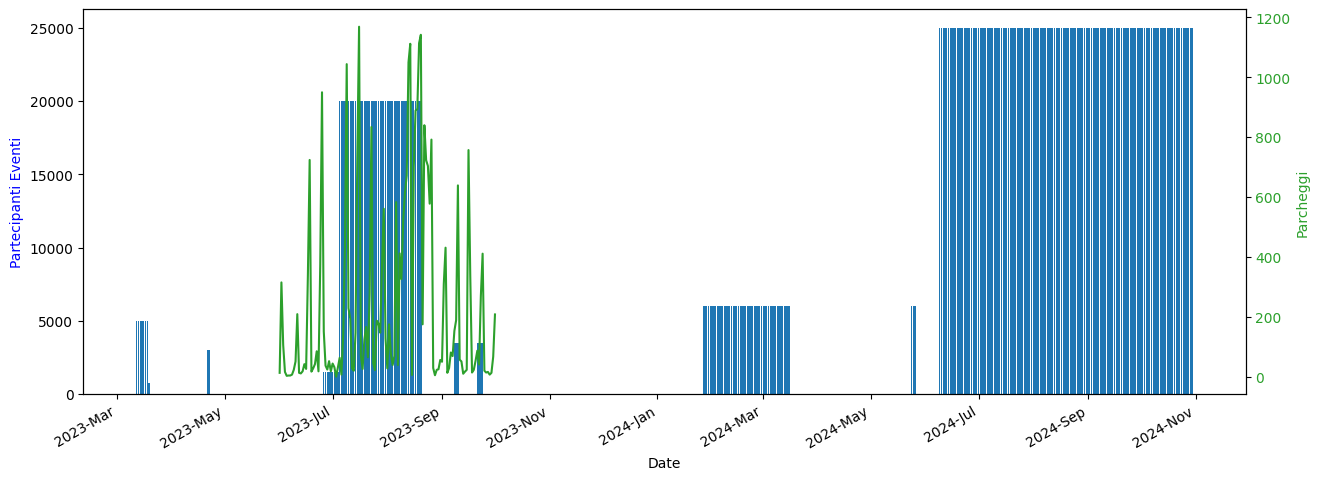

In [39]:
parcheggi_df = statistiche_parcheggi_molveno_df[
    (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
    (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
]
   
fig, axis = plt.subplots(figsize=(15, 5))

axis.set_xlabel('Date')
axis.set_ylabel('Partecipanti Eventi', color='blue')
#axis.set_title('Eventi', loc='left', y=0.85, x=0.02, fontsize='medium')
axis.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axis.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axis.bar(eventi["date"], eventi["participants"])

ax2 = axis.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Parcheggi', color=color)  
ax2.plot(parcheggi_df["date"], parcheggi_df["TOTALE"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [40]:
events_during_july_october_2023 = eventi[(eventi["date"] > "2023-07-01") & (eventi["date"] < "2023-10-31")]
events_during_july_october_2023

,event_name,date,organizer,location,participants
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500
21,Scuola Estiva Internazionale Royal Academy of ...,2023-07-06,Royal Academy of Dance srl,Altopiano Paganella,1500
...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500
